In [1]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In the IMDB dataset, movie reviews are categorized as having either a positive or negative sentiment.

As part of the dataset preparation, each review is transformed into a set of word embeddings, with each word represented by a fixed-length vector.

In [2]:
from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens.
# and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

A custom-trained embedding layer with a training sample size of 100 refers to an embedding layer that is trained specifically for a dataset containing only 100 training samples, where the embedding vectors for words are learned from scratch based on this small set of data.

In [3]:
# The number of words that should be considered as features
features = 10000
# Remove the text after this number of words(from the top max_features most common words)
length = 150

# Data loading to integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = x_train[:100]
y_train = y_train[:100]

# The integer lists are now transformed into a 2D integer tensor with the shape of {(samples, maxlen)}.
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
# In order to finally flatten the embedded inputs, the maximum length of the input to the Embedding layer is provided.
model1.add(Embedding(10000, 8, input_length=length))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape
#`(samples, maxlen * 8)`
model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

history1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 824ms/step - acc: 0.5016 - loss: 0.6922 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.8273 - loss: 0.6673 - val_acc: 0.5500 - val_loss: 0.6931
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9516 - loss: 0.6468 - val_acc: 0.5500 - val_loss: 0.6938
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9633 - loss: 0.6277 - val_acc: 0.5000 - val_loss: 0.6935
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9695 - loss: 0.6129 - val_acc: 0.5000 - val_loss: 0.6929
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9937 - loss: 0.5987 - val_acc: 0.5000 - val_loss: 0.6928
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 1.0000 - loss: 0.5805 - val_acc: 0.5000 - val_loss: 0.6935
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9937 - loss: 0.5624 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 1.0000 - loss: 0.5431 -

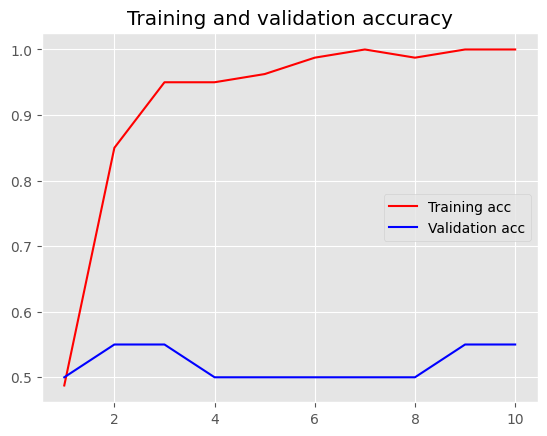

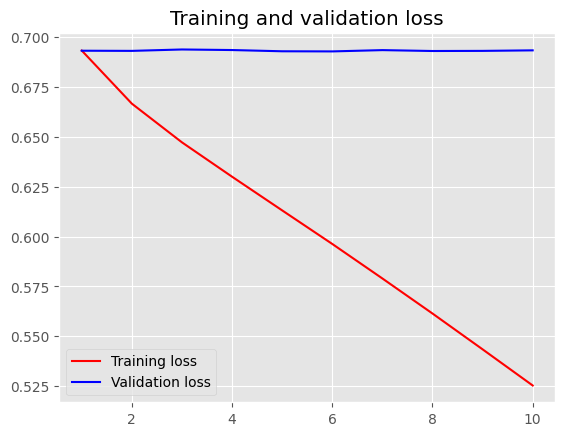

In [4]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy = history1.history["acc"]
# Validation accuracy
validation_accuracy = history1.history["val_acc"]
# Train loss
Train_loss = history1.history["loss"]
# Validation loss
validation_loss = history1.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "red", label = "Training acc")
plt.plot(epochs, validation_accuracy, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss, "red", label = "Training loss")
plt.plot(epochs, validation_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [5]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4959 - loss: 0.6948
Test loss: 0.6946161985397339
Test accuracy: 0.49823999404907227


In [6]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:5000]
y_train = y_train[:5000]

In [7]:
model2 = Sequential()
model2.add(Embedding(10000, 8, input_length=length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()
history2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.4963 - loss: 0.6934 - val_acc: 0.5470 - val_loss: 0.6898
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.7208 - loss: 0.6709 - val_acc: 0.6540 - val_loss: 0.6699
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8259 - loss: 0.6158 - val_acc: 0.7190 - val_loss: 0.6174
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8671 - loss: 0.5140 - val_acc: 0.7640 - val_loss: 0.5421
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9014 - loss: 0.4047 - val_acc: 0.7860 - val_loss: 0.4870
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9148 - loss: 0.3124 - val_acc: 0.7910 - val_loss: 0.4578
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9373 - loss: 0.2478 - val_acc: 0.8100 - val_loss: 0.4245
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9510 - loss: 0.2002 - val_acc: 0.8090 - val_loss: 0.4216
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

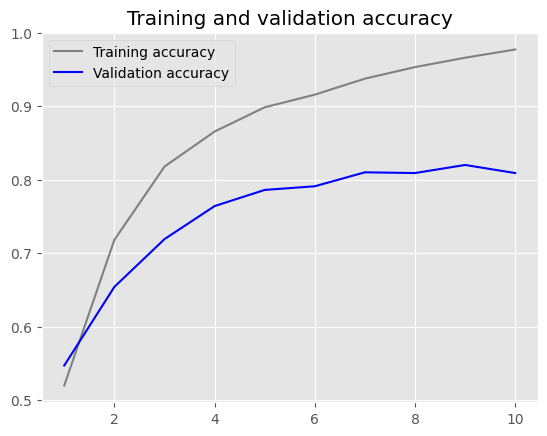

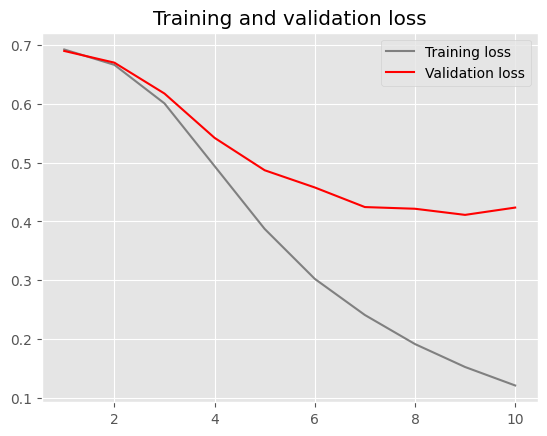

In [8]:
accuracy2 = history2.history['acc']
validation_accuracy2 = history2.history['val_acc']
Train_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']

epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, 'grey', label='Training accuracy')
plt.plot(epochs, validation_accuracy2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, Train_loss2, 'grey', label='Training loss')
plt.plot(epochs, validation_loss2, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8166 - loss: 0.3941
Test loss: 0.39526620507240295
Test accuracy: 0.8168799877166748


A custom-trained embedding layer with a training sample size of 1000 refers to an embedding layer that is trained from scratch using a dataset containing 1000 training samples, where the word embeddings are learned specifically from this data.

In [10]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:1000]
y_train = y_train[:1000]

In [11]:
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()
history3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - acc: 0.4937 - loss: 0.6943 - val_acc: 0.5950 - val_loss: 0.6906
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7606 - loss: 0.6776 - val_acc: 0.6050 - val_loss: 0.6897
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8930 - loss: 0.6603 - val_acc: 0.6150 - val_loss: 0.6881
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9100 - loss: 0.6393 - val_acc: 0.6050 - val_loss: 0.6861
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9436 - loss: 0.6130 - val_acc: 0.6200 - val_loss: 0.6832
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9608 - loss: 0.5801 - val_acc: 0.6250 - val_loss: 0.6793
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9590 - loss: 0.5403 - val_acc: 0.6050 - val_loss: 0.6749
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9705 - loss: 0.5006 - val_acc: 0.6150 - val_loss: 0.6694
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9847 - loss:

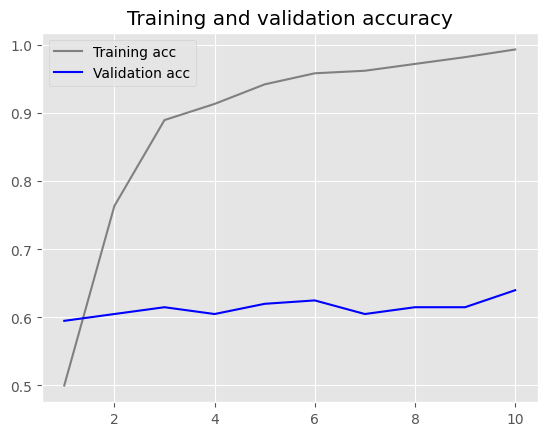

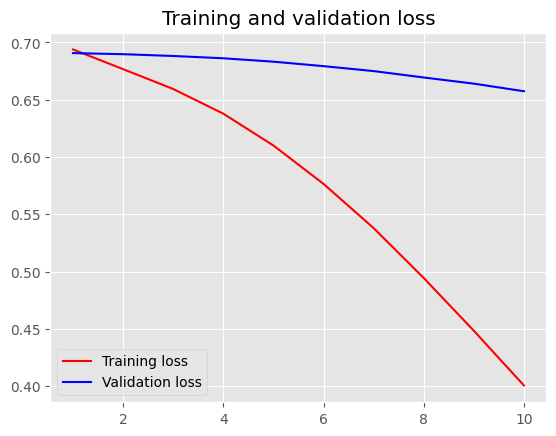

In [12]:
accuracy3 = history3.history["acc"]
validation_accuracy3 = history3.history["val_acc"]
Train_loss3 = history3.history["loss"]
validation_loss3 = history3.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy3, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss3, "red", label = "Training loss")
plt.plot(epochs, validation_loss3, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


In [13]:
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.6068 - loss: 0.6653
Test loss: 0.6660099029541016
Test accuracy: 0.6025999784469604


A custom-trained embedding layer with a training sample size of 10,000 refers to an embedding layer that is trained from the ground up using a dataset consisting of 10,000 training samples, where the word embeddings are specifically learned based on this larger set of data.

In [14]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:10000]
y_train = y_train[:10000]

In [15]:
model4 = Sequential()
model4.add(Embedding(10000, 8, input_length=length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()
history4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.5369 - loss: 0.6911 - val_acc: 0.6940 - val_loss: 0.6675
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7730 - loss: 0.6199 - val_acc: 0.7845 - val_loss: 0.5099
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8421 - loss: 0.4381 - val_acc: 0.8230 - val_loss: 0.3975
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8840 - loss: 0.3226 - val_acc: 0.8540 - val_loss: 0.3426
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9076 - loss: 0.2577 - val_acc: 0.8555 - val_loss: 0.3305
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9343 - loss: 0.2071 - val_acc: 0.8530 - val_loss: 0.3234
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9499 - loss: 0.1689 - val_acc: 0.8580 - val_loss: 0.3224
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9629 - loss: 0.1353 - val_acc: 0.8565 - val_loss: 0.3264
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

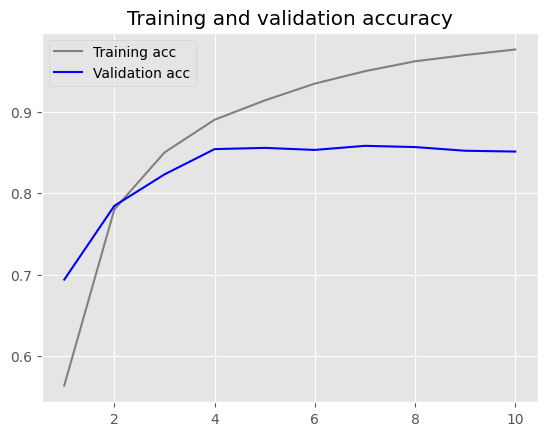

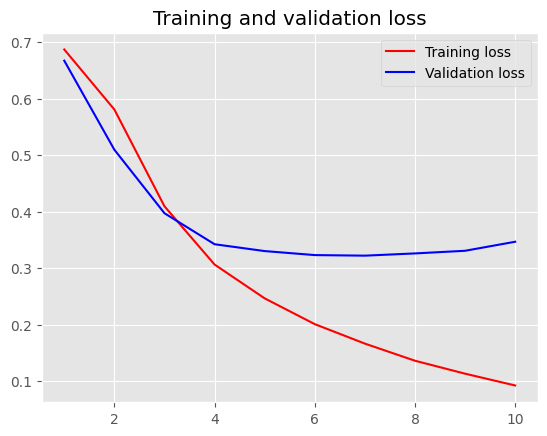

In [16]:
accuracy4 = history4.history["acc"]
validation_accuracy4 = history4.history["val_acc"]
Train_loss4 = history4.history["loss"]
validation_loss4 = history4.history["val_loss"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy4, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss4, "red", label = "Training loss")
plt.plot(epochs, validation_loss4, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


In [17]:
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8469 - loss: 0.3614
Test loss: 0.35718148946762085
Test accuracy: 0.8481199741363525


In [18]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  27.8M      0  0:00:02  0:00:02 --:--:-- 27.7M


In [19]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Pretrained word embeddings can be utilized when there is not enough training data to generate word embeddings for the specific task you are working on.


Tokenizing the data

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

length2 = 150  # Cut off review after 150 words
train_data = 100  # Training sample 100
valid_data = 10000  # Validation sample 10000
words = 10000  # Considers only the top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

# Split data into training and validation set, but shuffle it, since samples are ordered:
# all negatives first, then all positives
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_validation = data[train_data:train_data+valid_data]
y_validation = labels[train_data:train_data+valid_data]


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Installing and setting  the GloVe word embedding

In [21]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


We trained the 6B version of the GloVe model using a corpus consisting of Wikipedia data and Gigaword 5, which includes 6 billion tokens and 400,000 words.

Creating the GloVe word embeddings matrix with a pretrained embedding layer using a training sample size of 100.

In [22]:
embedd_di = 100

embedding_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedd_vector

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, embedd_di, input_length=length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

embedding_dim = embedding_matrix.shape[1]  # Set embedding dimension based on matrix
vocab_size = embedding_matrix.shape[0]  # Set vocab size based on matrix

# Define the model with an Embedding layer initialized with the embedding matrix
model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=length2,
        trainable=False  # Set trainable to False directly if you want it non-trainable
    )
)

# Check the model summary to confirm the embedding layer has loaded weights
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

embedding_dim = embedding_matrix.shape[1]  # Set embedding dimension from matrix
vocab_size = embedding_matrix.shape[0]  # Set vocab size from matrix

# Define the model
model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=length2,
        trainable=False
    )
)
model.add(GlobalAveragePooling1D())  # Reduces 3D tensor to 2D
model.add(Dense(1, activation='sigmoid'))  # Final output layer for binary classification

# Compile and fit the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the model weights
model.save_weights('pre_trained_glove_model.weights.h5')



Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 661ms/step - acc: 0.5483 - loss: 0.6921 - val_acc: 0.5096 - val_loss: 0.6937
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - acc: 0.5750 - loss: 0.6872 - val_acc: 0.5022 - val_loss: 0.6946
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - acc: 0.5163 - loss: 0.6893 - val_acc: 0.5013 - val_loss: 0.6950
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - acc: 0.5297 - loss: 0.6922 - val_acc: 0.5076 - val_loss: 0.6935
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - acc: 0.5651 - loss: 0.6867 - val_acc: 0.5088 - val_loss: 0.6933
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - acc: 0.5297 - loss: 0.6890 - val_acc: 0.5180 - val_loss: 0.6925
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - acc: 0.5658 - loss: 0.6879 - val_acc: 0.5121 - val_loss: 0.6927
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - acc: 0.5697 - loss: 0.6886 - val_acc: 0.5272 - val_loss: 0.6919
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - acc: 0.5469 - loss: 

The pretrained word embedding is loaded into the Embedding layer. By setting `trainable=False` when invoking the layer, the embeddings remain fixed and are not updated during training. If `trainable=True` is set, the optimization process can adjust the word embedding values. It's generally advisable not to update the pretrained embeddings while the model is still being trained to prevent it from "forgetting" the knowledge it has already acquired.

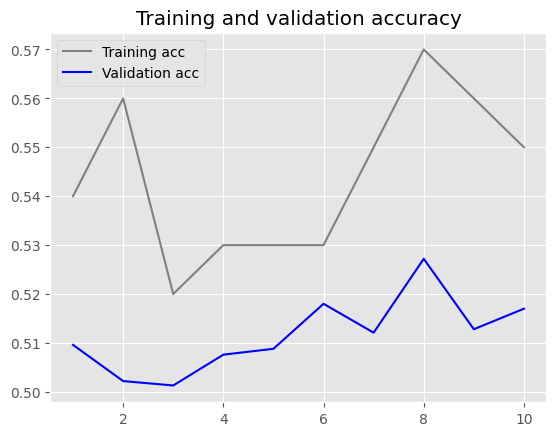

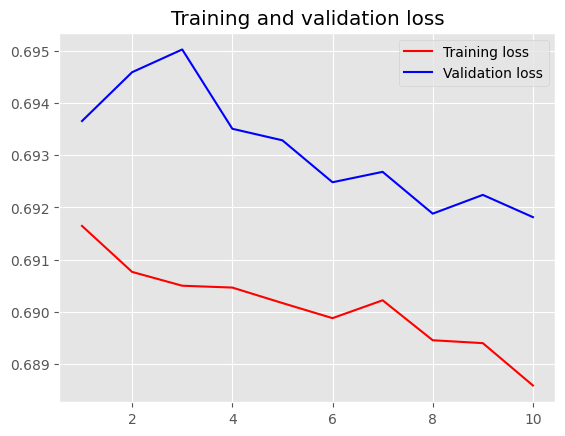

In [26]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
valid_accuracy = history.history['val_acc']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'red', label='Training loss')
plt.plot(epochs, valid_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5071 - loss: 0.6930
Test loss: 0.6932308673858643
Test accuracy: 0.5023999810218811


Pretrained word embedding layer with a training sample size of 5,000.

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model11 = Sequential()
model11.add(Embedding(words, embedd_di, input_length=length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))

# Build the model explicitly by specifying an input shape
model11.build(input_shape=(None, length2))

# Load pretrained weights
model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False

# Compile and fit the model
model11.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history11 = model11.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the model weights
model11.save_weights('pre_trained_glove_model.weights.h5')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 576ms/step - acc: 0.4602 - loss: 3.1389 - val_acc: 0.5008 - val_loss: 0.7016
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - acc: 0.7901 - loss: 0.4651 - val_acc: 0.5067 - val_loss: 0.9204
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - acc: 0.7717 - loss: 0.5255 - val_acc: 0.5079 - val_loss: 0.7961
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - acc: 0.9645 - loss: 0.2222 - val_acc: 0.4993 - val_loss: 1.3199
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 0.9382 - loss: 0.1926 - val_acc: 0.5117 - val_loss: 0.8608
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - acc: 1.0000 - loss: 0.0815 - val_acc: 0.5107 - val_loss: 0.8786
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - acc: 1.0000 - loss: 0.0595 - val_acc: 0.5149 - val_loss: 0.8421
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - acc: 1.0000 - loss: 0.0380 - val_acc: 0.5060 - val_loss: 0.9698
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - acc: 1.0000 - loss: 

In [29]:
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.5005 - loss: 0.8153
Test loss: 0.8196579813957214
Test accuracy: 0.49775999784469604


Pretrained word embedding layer with a training sample size of 1,000.

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [31]:
# Force the embedding layer to build its weights by calling build()
model11.layers[0].build(input_shape=(None, length2))


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 449ms/step - acc: 0.9047 - loss: 0.3262 - val_acc: 0.5292 - val_loss: 0.7643
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - acc: 1.0000 - loss: 0.0165 - val_acc: 0.5290 - val_loss: 0.7751
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - acc: 1.0000 - loss: 0.0110 - val_acc: 0.5241 - val_loss: 0.8617
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - acc: 1.0000 - loss: 0.0095 - val_acc: 0.5288 - val_loss: 0.8189
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - acc: 1.0000 - loss: 0.0069 - val_acc: 0.5033 - val_loss: 1.4346
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 1.0000 - loss: 0.0140 - val_acc: 0.5271 - val_loss: 0.8185
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - acc: 1.0000 - loss: 0.0046 - val_acc: 0.5265 - val_loss: 0.8087
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 392ms/step - acc: 1.0000 - loss: 0.0041 - val_acc: 0.5275 - val_loss: 0.8219
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - acc: 1.0000 - loss: 

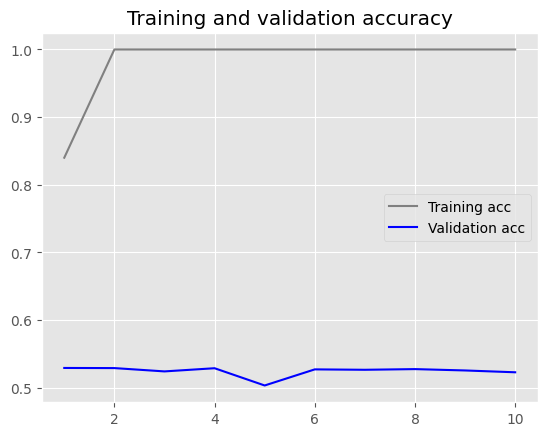

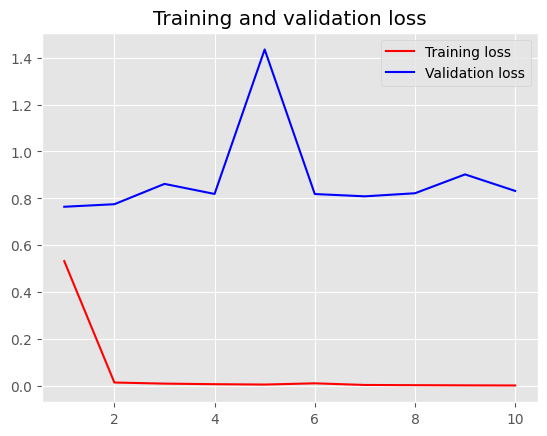

In [32]:
# Build the embedding layer to initialize weights
model11.layers[0].build(input_shape=(None, length2))

# Set the pre-trained embedding matrix as weights for the embedding layer
model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False

# Compile the model
model11.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

# Fit the model
history11 = model11.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the weights with the required file name
model11.save_weights('pre_trained_glove_model.weights.h5')

# Plotting training and validation results
import matplotlib.pyplot as plt

accuracy11 = history11.history['acc']
valid_acc11 = history11.history['val_acc']
train_loss11 = history11.history['loss']
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'grey', label='Training acc')
plt.plot(epochs, valid_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'red', label='Training loss')
plt.plot(epochs, valid_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [33]:
# Evaluate the model
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)

# Print test loss and accuracy
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.4968 - loss: 0.8846
Test loss: 0.8820487260818481
Test accuracy: 0.4955599904060364


Pretrained word embedding layer with a training sample size of 10,000.

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - acc: 0.4743 - loss: 2.0198 - val_acc: 0.4999 - val_loss: 0.6932
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.5860 - loss: 0.7347 - val_acc: 0.5022 - val_loss: 0.6940
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - acc: 0.6339 - loss: 0.6505 - val_acc: 0.5000 - val_loss: 0.7161
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - acc: 0.6941 - loss: 0.5869 - val_acc: 0.5013 - val_loss: 1.0065
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.7596 - loss: 0.4642 - val_acc: 0.5025 - val_loss: 0.8407
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.8359 - loss: 0.3685 - val_acc: 0.5040 - val_loss: 0.8069
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9455 - loss: 0.2239 - val_acc: 0.4998 - val_loss: 1.0452
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.8814 - loss: 0.2682 - val_acc: 0.4992 - val_loss: 2.0411
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9477

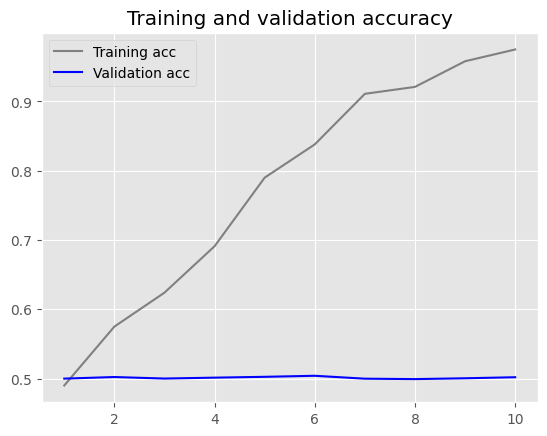

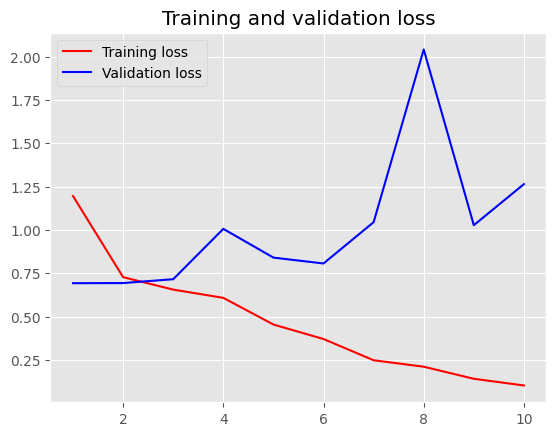

In [34]:

import numpy as np

length = 150
train_data = 1000 #Trains on 1000 samples
valid_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_val = data[train_data:train_data+valid_data]
y_val = labels[train_data:train_data+valid_data]
embedding_dim = 100

embedd_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedd_matrix[i] = embedding_vector


model12 = Sequential()
model12.add(Embedding(words, embedding_dim, input_length=length))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()

# Explicitly build the embedding layer to initialize weights
model12.layers[0].build(input_shape=(None, length))

# Set the pre-trained embedding matrix as weights
model12.layers[0].set_weights([embedd_matrix])
model12.layers[0].trainable = False

# Compile the model
model12.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

# Fit the model
history12 = model12.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)
model12.save_weights('pre_trained_glove_model.weights.h5')
import matplotlib.pyplot as plt

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'grey', label='Training acc')
plt.plot(epochs, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'red', label='Training loss')
plt.plot(epochs, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
test_loss12, test_accuracy12 = model12.evaluate(x_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5094 - loss: 1.2569
Test loss: 1.2785600423812866
Test accuracy: 0.5035200119018555


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - acc: 0.5071 - loss: 1.6119 - val_acc: 0.4999 - val_loss: 0.6935
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.5550 - loss: 0.6911 - val_acc: 0.5000 - val_loss: 0.6933
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.6272 - loss: 0.6613 - val_acc: 0.4974 - val_loss: 0.7023
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - acc: 0.7802 - loss: 0.5223 - val_acc: 0.5004 - val_loss: 0.8601
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - acc: 0.8392 - loss: 0.3986 - val_acc: 0.4983 - val_loss: 0.7522
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.8942 - loss: 0.2966 - val_acc: 0.4954 - val_loss: 0.9547
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - acc: 0.8908 - loss: 0.2752 - val_acc: 0.4968 - val_loss: 0.9027
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.8767 - loss: 0.2927 - val_acc: 0.5050 - val_loss: 1.3589
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9626

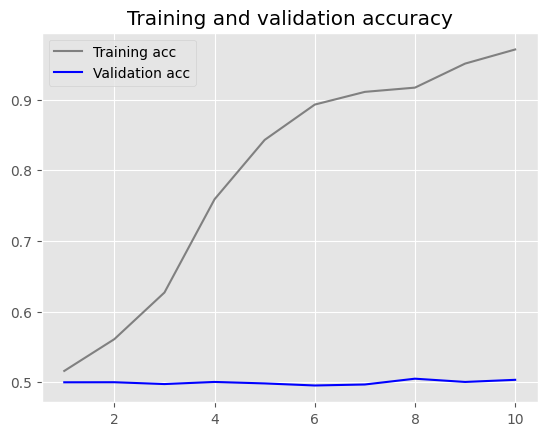

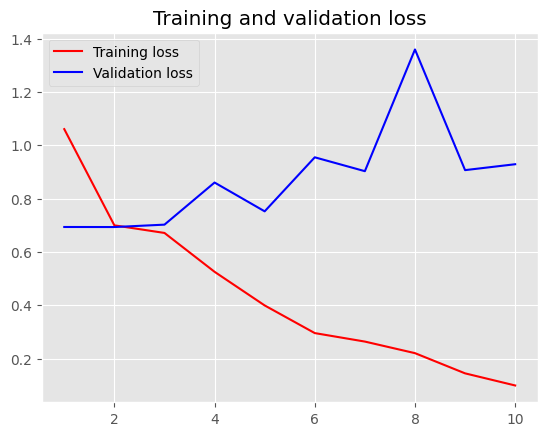

In [38]:
model13 = Sequential()
model13.add(Embedding(words, embedding_dim, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

# Build and set the embedding matrix
model13.layers[0].build(input_shape=(None, length))
model13.layers[0].set_weights([embedd_matrix])
model13.layers[0].trainable = False

# Compile the model
model13.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

# Train the model
history13 = model13.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)

# Save weights
model13.save_weights('pre_trained_glove_model.weights.h5')

# Plot results
import matplotlib.pyplot as plt

accuracy13 = history13.history['acc']
valid_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
valid_loss13 = history13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'grey', label='Training acc')
plt.plot(epochs, valid_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'red', label='Training loss')
plt.plot(epochs, valid_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [39]:
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5060 - loss: 0.9166
Test loss: 0.9167556166648865
Test accuracy: 0.5020400285720825
